# Fehleranalyse: Parkbremszylinder

## Problemstellung
Die folgende Analyse wird Zusammenhänge und Wechselwirkungen zwischen der von Ihnen bemängelten unzureichenden Anpresskraft im Parkbremszylinder und den beteiligten Parkbremszylinderkomponenten aufzeigen.
Hierzu bediene ich mich der Visualisierung mittels Jupyter Notebook. 
Ich werde die von Ihnen bereitgestellten Rohdaten mittels verschiedener Werkzeuge analysieren und dadurch produktionsbedingte Fertigungstoleranzen in Verbindung zur fehlerhaften Anpresskraft des Bremszylinders setzen. 
Die gewonnenen Erkenntnisse dienen zur Fertigungs- und Konstruktionsanpassung um zukünftigen Ausschuss zu minimieren.

In [546]:
# OS to use file system
import os
# Matplotlib and the pyplot module for a Matlab-like plot syntax
import matplotlib
# This is the syntax to import as a named module
import matplotlib.pyplot as plt
# Pandas is a module for rectangular data "dataframe"
import pandas as pd
# Special module for a very quick analysis
from pandas.plotting import scatter_matrix
# Plot the graphs in the notebook
%matplotlib inline

## Tabelle 1.0 
Im ersten Schritt werden die von Ihnen bereitgestellten Daten importiert und überprüft, ob diese korrekt übernommen wurden.


Of course, we need to get our hands dirty on the data:

In [547]:
# Import the csv-data to pandas dataframe (canonical name df)
df = pd.read_csv(os.path.join("SpringPBData.csv"))
# Display the first lines of the df
df.head()

,Unnamed: 0,F,d,h1,h2,l,x
0,2017-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860,-0.057963
1,2017-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965,0.018917
2,2017-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146,-0.011473
3,2017-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969,-0.096269
4,2017-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235,-0.091767


In [548]:
# Rename first column
df.rename(columns = {"Unnamed: 0":"Time"}, inplace = True)
# Transform first column from string to datetimeindex
df.set_index(pd.to_datetime(df["Time"]), inplace = True)
# Delete second ocurrence of time
df.drop("Time", axis = 1, inplace = True)
df.head()

,F,d,h1,h2,l,x
Time,,,,,,
2017-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860,-0.057963
2017-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965,0.018917
2017-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146,-0.011473
2017-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969,-0.096269
2017-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235,-0.091767


A quick overview of the data properties:

## Tabelle 1.1 
In diesem Schritt werden die Daten einer ersten Analyse unterzogen, um ein Gefühl der Varianz zu bekommen. 


Folgende Aussage liefert die dargestellte Grafik:
    -Die Kraft F variiert zwischen einem Maximum von 24712.1 N und einem Minimum von 15489.8 N. 
    --> Somit unterschreiten, wie von Ihnen beschrieben, Parkbremsen das von Ihnen gesetzte Minimum von 18000 N.  
    -Die Werte d, h1, h2, l, und x unterliegen ebenso Schwankungen. Die ermittelten Werte weichen dem Sollwert sowohl im Positiven als auch Negativen ab.

In [549]:
df.describe()



,F,d,h1,h2,l,x
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,19925.104371,0.001442,-0.002048,-0.002475,-0.000427,-0.003508
std,1741.052226,0.029159,0.028942,0.040490,0.028682,0.086310
min,15489.816125,-0.049817,-0.049068,-0.097265,-0.049764,-0.226313
25%,18725.767834,-0.022687,-0.027416,-0.028829,-0.023204,-0.062706
50%,19941.716842,0.002220,-0.002563,0.000576,-0.001452,-0.000532
75%,21050.563306,0.026744,0.022772,0.025438,0.024548,0.057110
max,24712.106835,0.049961,0.049019,0.091062,0.049817,0.222216


## Abbildung 1.0
In der Abbildung 1.0 wurden die Rohdaten entsprechend der unzureichenden Anpresskräfte mit den dazugehörigen Maßtoleranzen der Parkbremskomponenten gefiltert. In der Abbildung 1.1 werden diese Daten einer ersten Analyse unterzogen.

In [533]:
df[df["F"]< 18000]





,F,d,h1,h2,l,x
Time,,,,,,
2017-10-26 07:42:00,15969.394445,-0.031502,-0.046969,-0.080410,-0.033441,-0.192323
2017-10-26 08:38:00,17695.840912,0.033534,-0.031506,-0.071098,-0.039592,-0.108662
2017-10-26 08:40:00,16968.687761,0.011802,-0.046347,-0.076916,-0.030570,-0.142031
2017-10-26 08:42:00,17442.243443,0.029513,-0.041646,-0.059912,-0.018266,-0.090311
2017-10-26 08:44:00,15682.401992,-0.031538,-0.044601,-0.087096,-0.042495,-0.205730
2017-10-26 09:10:00,17720.028500,-0.021609,-0.032264,-0.058451,-0.026187,-0.138511
2017-10-26 09:30:00,17540.456284,-0.025488,-0.029431,-0.044445,-0.015014,-0.114378
2017-10-26 09:40:00,15489.816125,-0.044298,-0.044884,-0.091008,-0.046124,-0.226313
2017-10-26 09:50:00,16788.640168,-0.048110,-0.018026,-0.061180,-0.043155,-0.170470


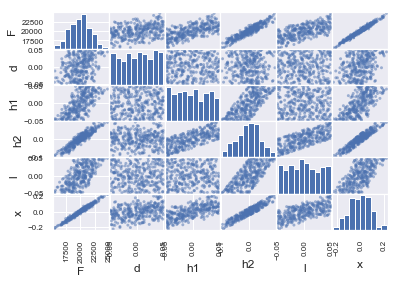

In [550]:
q = scatter_matrix(df)

I prefer nice plots, I recommend either seaborn:

## Abbildung 1.1
Die dargestellte Scattermatrix ist eine Haupteffektanalyse. Dabei werden Wechselwirkungen zwischen den geometrischen Abmaßen und der Anpresskraft visualisiert.
Es ist zu erkennen:
    -Die Federlänge x hat einen signifikanten Einfluss auf die Anpresskraft. Dies ist durch die Federgleichung leicht erklärbar. F=c*DeltaX (c=Federkonstante; DeltaX=Längenänderung der Feder)
    -Die Breiten h1 und h2 korrelieren ebenfalls, auch wenn nicht so ausgeprägt wie x, mit der Anpresskraft.
Dieser Systematik wird in den nachfolgenden graphischen Darstellungen nachgegangen.

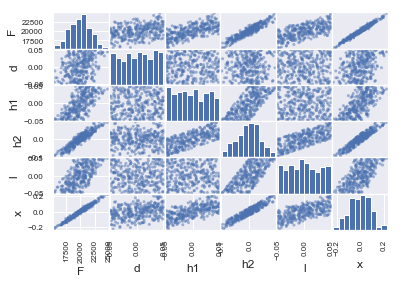

In [551]:
import seaborn as sns
sns.set()
q = scatter_matrix(df)

## Abbildung 1.2
Eine genauere Betrachtung des Zusammenhangs zwischen der Anpresskraft F und der Federlänge x zeigt, dass ein direkter Zusammenhang besteht. 
Im oberen Abmessungsbereich von x=0.2mm ist die Anpresskraft am größten. Mit sinkender Länge x sinkt auch die Anpresskraft. Es gibt keine Ausreißer und das Verhältnis kann als prportional angenommen werden. Bei einem Untermaß von x=-0.1mm liegt die Federkraft in jedem Fall unter der zulässigen minimalen Kraft von 18000N.

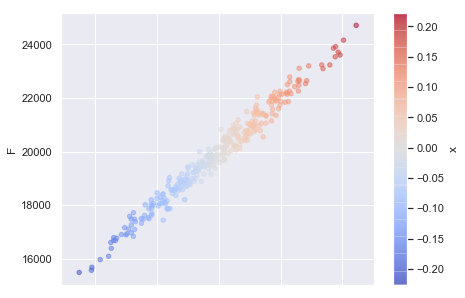

In [557]:
df.plot(kind="scatter", y="F", x="x", alpha = 0.5, figsize=(7,5), c = "x", cmap = "coolwarm")

### Abbildung 1.3
In dieser Abbildung ist wie in der Abbildung 1.1 der Zusammenhang zwischen der Größe F und x dargestellt. Im Gegnsatz zur Abbildung 1.1 wird jedoch auch der direkte Zusammenhang der Hammerkopfbreite h2 aufgezeigt. Auch hier ist eine proportionale und lineare Abhängigkeit zu erkennen.
Dies bedeutet, dass ein Untermaß der Größe h2 die negative Beeinflussung der Größe x verstärkt und eine übermaßige Länge h2 den negativen Einfluss von x ausgleichen kann. Erst ab einem Untermaß von h2 = (-0.050) hat eine Unterschreitung der Anpresskraft von 18000N zur Folge.


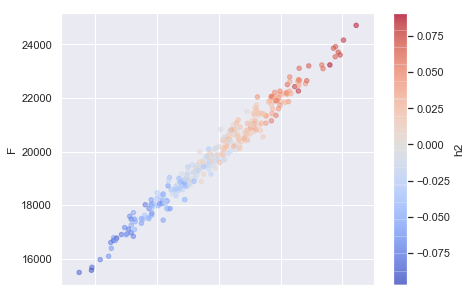

In [564]:
df.plot(kind="scatter", y="F", x="x", alpha = 0.5, figsize=(7,5), c = "h2", cmap = "coolwarm")

## Abbildung 1.4
Ein anfangs vermuteter Einfluss von h2 kann mit der Abbildung 1.3 relativiert werden. Die Streuung ist in diesem Fall zu groß und es kann kein proportionaler Zusammenhang hergestellt werden. Ein übermaßiges Bauteil h1 kann sowohl eine ausreichende als auch eine unzureichende Anpresskraft zur Folge haben. 

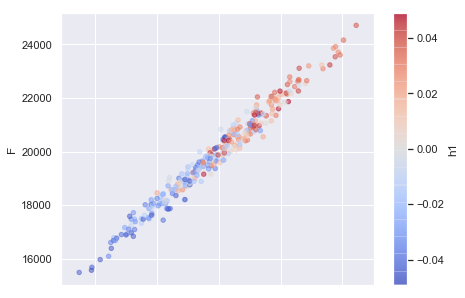

In [558]:
df.plot(kind="scatter", y="F", x="x", alpha = 0.5, figsize=(7,5), c = "h1", cmap = "coolwarm")

## Abbildung 1.5
Diese Erkenntnis wird durch die Abbildung 1.4 unterstützt. 
Es ist ein Zusammenhang zwischen der Federlänge x und der Hammerbreite h2 ersichtlich. Dieser ist proportional und linear. Ein untermaßiges x korrespondiert mit einem untermaßigen h2. Die Größe h1 korrespondiert allerdings nicht.


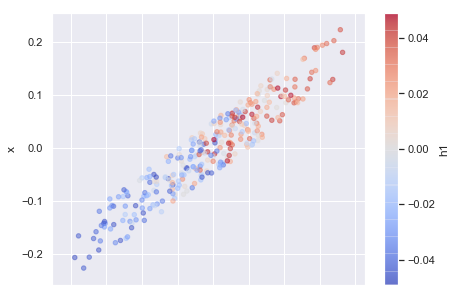

In [562]:
df.plot(kind="scatter", y="x", x="h2", alpha = 0.5, figsize=(7,5), c = "h1", cmap = "coolwarm")

## Beurteilung der Analyse
Es wurde ein eindeutiger Zusammenhang zwischen der Federlänge x und der Hammerkopfbreite h2 bezogen auf die Anpresskraft F ermittelt. Die Korrelation zwischen x und h2 muss durch weitere Analyse des Breszylinders und der Fertigung ermittelt werden. Ist die Größe x tatsächlich die Federlänge oder beschreibt diese eine andere Geometrie oder Größe ? 
    -Hierzu würde ich Sie bitten, mir weitere Informationen zukommen zu lassen.
Wie hängen diese beiden Größen zusammen ? Fertigungstechnisch oder Geometrisch ?
Fest steht:
    -Ab einem Untermaß von x= (0.2) oder h2 = (-0.050mm) wird die erforderliche Anpresskraft F>=18000N nicht mehr erreicht.

You can receive all indizes' truth value for a given criterion:

And use this to filter only the required lines in the df. Note that I'm only interested in the Force here, so why not show only "F"?

In [529]:
df["F"] < 18000

Time
2017-10-26 07:30:00    False
2017-10-26 07:32:00    False
2017-10-26 07:34:00    False
2017-10-26 07:36:00    False
2017-10-26 07:38:00    False
2017-10-26 07:40:00    False
2017-10-26 07:42:00     True
2017-10-26 07:44:00    False
2017-10-26 07:46:00    False
2017-10-26 07:48:00    False
2017-10-26 07:50:00    False
2017-10-26 07:52:00    False
2017-10-26 07:54:00    False
2017-10-26 07:56:00    False
2017-10-26 07:58:00    False
2017-10-26 08:00:00    False
2017-10-26 08:02:00    False
2017-10-26 08:04:00    False
2017-10-26 08:06:00    False
2017-10-26 08:08:00    False
2017-10-26 08:10:00    False
2017-10-26 08:12:00    False
2017-10-26 08:14:00    False
2017-10-26 08:16:00    False
2017-10-26 08:18:00    False
2017-10-26 08:20:00    False
2017-10-26 08:22:00    False
2017-10-26 08:24:00    False
2017-10-26 08:26:00    False
2017-10-26 08:28:00    False
                       ...  
2017-10-26 16:30:00     True
2017-10-26 16:32:00     True
2017-10-26 16:34:00    False
2017-10-2

In [559]:
df[df["F"] < 18000]["F"]

Time
2017-10-26 07:42:00    15969.394445
2017-10-26 08:38:00    17695.840912
2017-10-26 08:40:00    16968.687761
2017-10-26 08:42:00    17442.243443
2017-10-26 08:44:00    15682.401992
2017-10-26 09:10:00    17720.028500
2017-10-26 09:30:00    17540.456284
2017-10-26 09:40:00    15489.816125
2017-10-26 09:50:00    16788.640168
2017-10-26 10:02:00    17985.502146
2017-10-26 10:06:00    17875.418354
2017-10-26 10:10:00    15571.613024
2017-10-26 10:22:00    16681.380671
2017-10-26 10:30:00    17326.147903
2017-10-26 10:48:00    16930.780258
2017-10-26 11:42:00    16904.952889
2017-10-26 12:14:00    17478.488596
2017-10-26 12:20:00    17976.404113
2017-10-26 12:26:00    16389.618636
2017-10-26 12:32:00    17496.067768
2017-10-26 12:42:00    17164.365261
2017-10-26 12:46:00    16768.719151
2017-10-26 13:10:00    17501.398400
2017-10-26 13:12:00    17260.990608
2017-10-26 13:14:00    17871.209199
2017-10-26 13:20:00    17480.124431
2017-10-26 13:24:00    17856.309847
2017-10-26 14:10:00    